# Hierarchical Clustering  Crime data

In [24]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#load the dataset

In [4]:
df=pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
df.drop(df.columns[0], axis=1,inplace=True)
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


# EDA

In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
df.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [8]:
df.duplicated().sum()

0

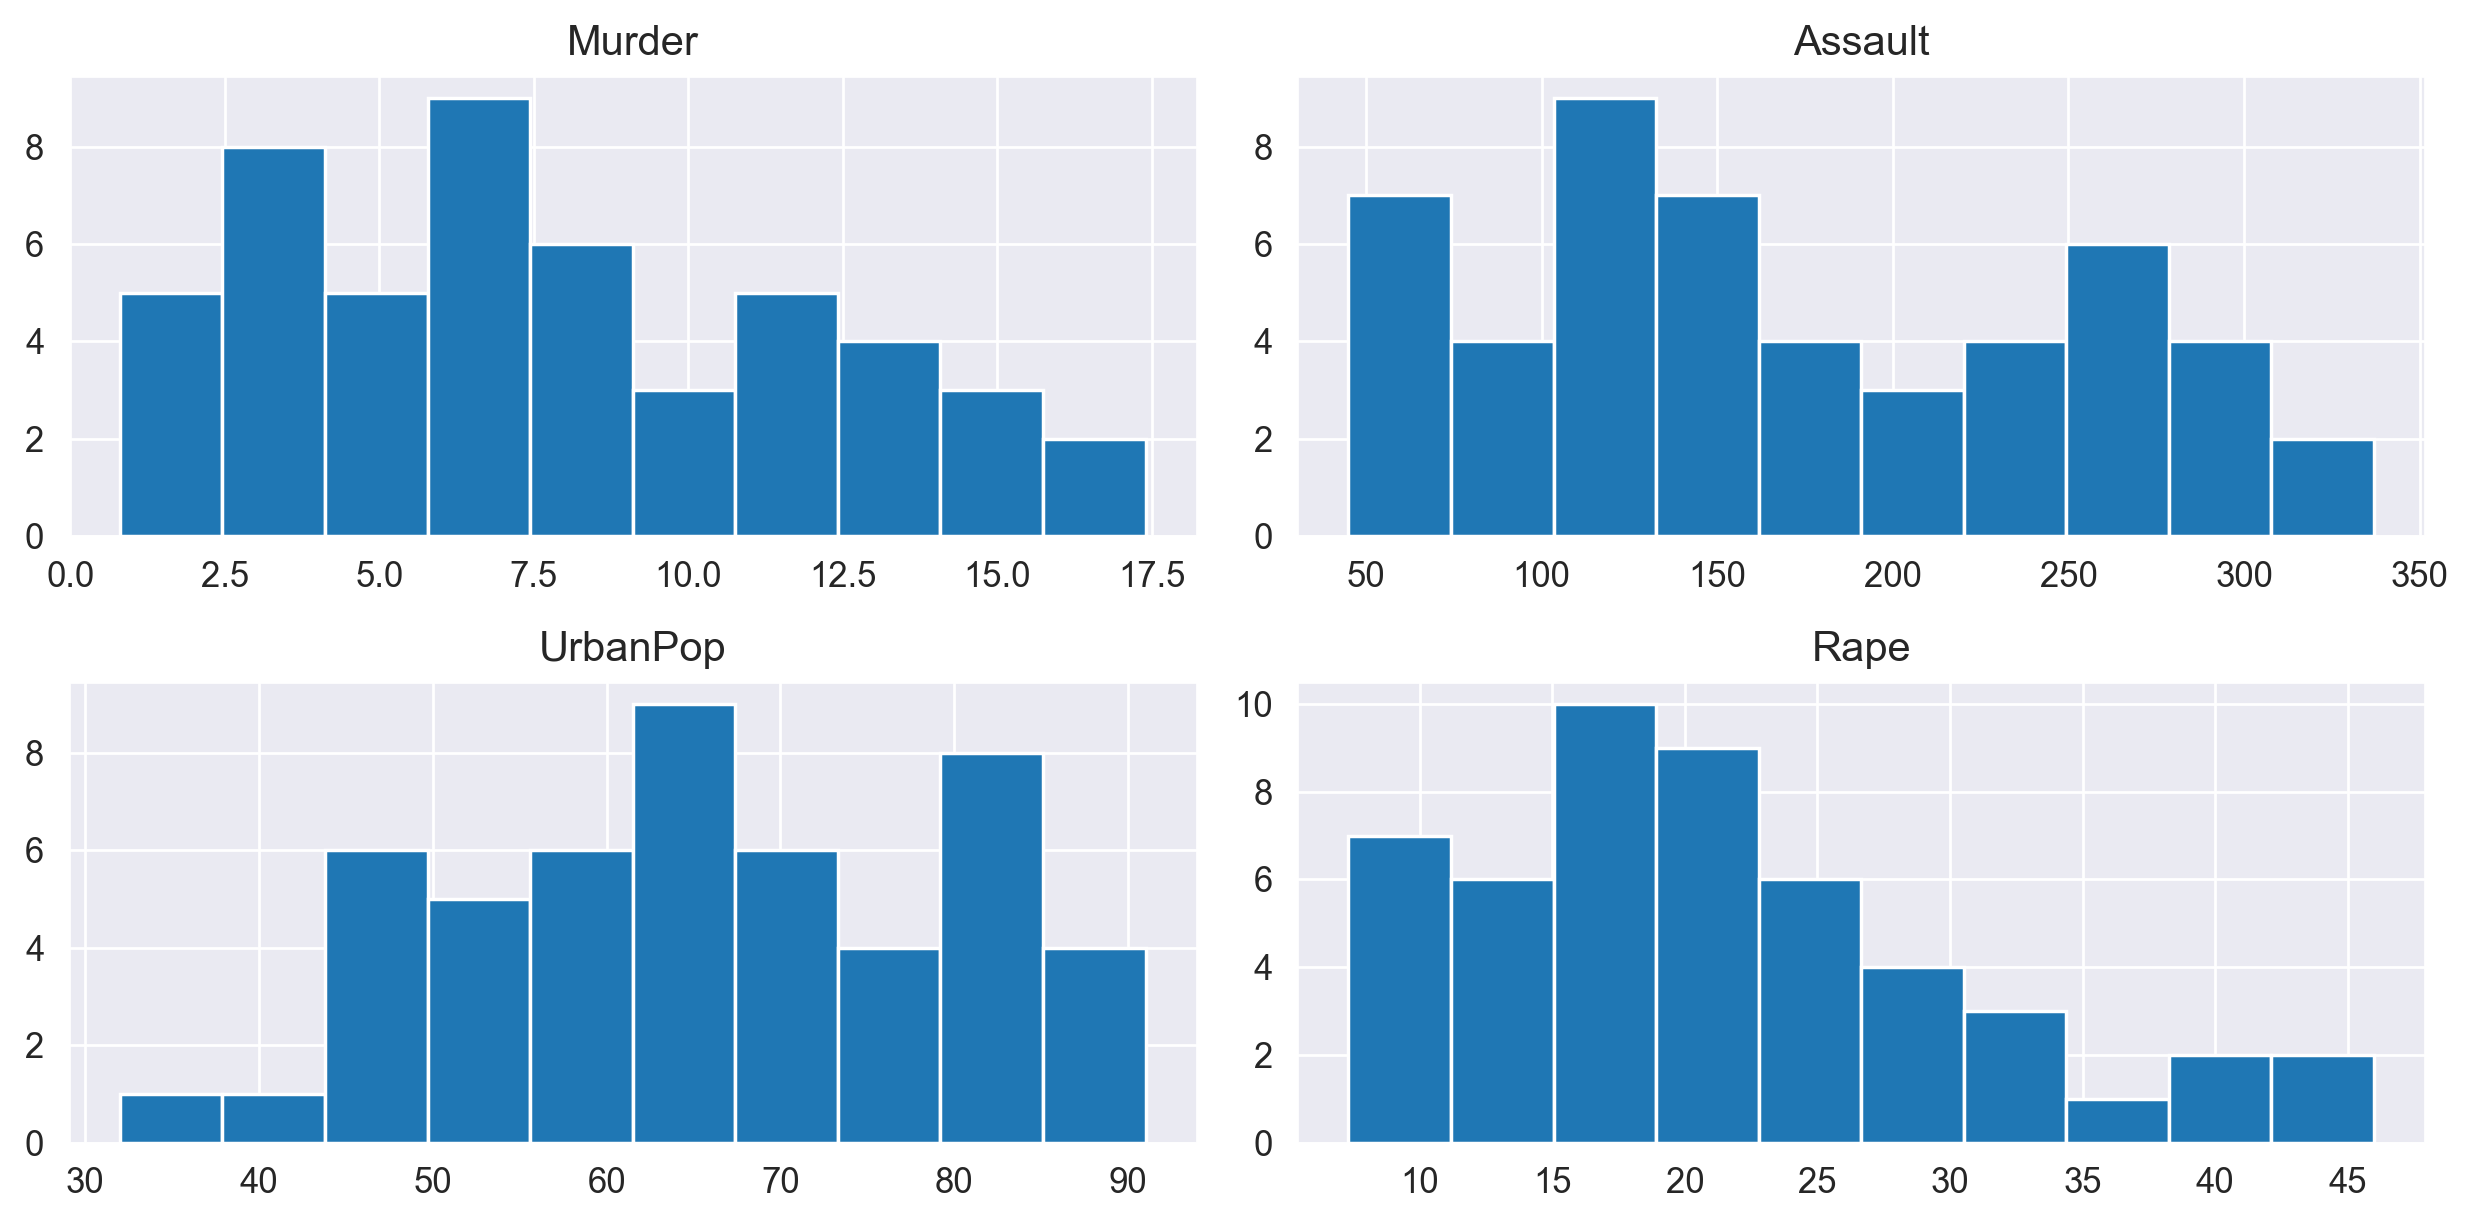

In [9]:
df.hist()
plt.tight_layout()

<Axes: xlabel='Murder'>

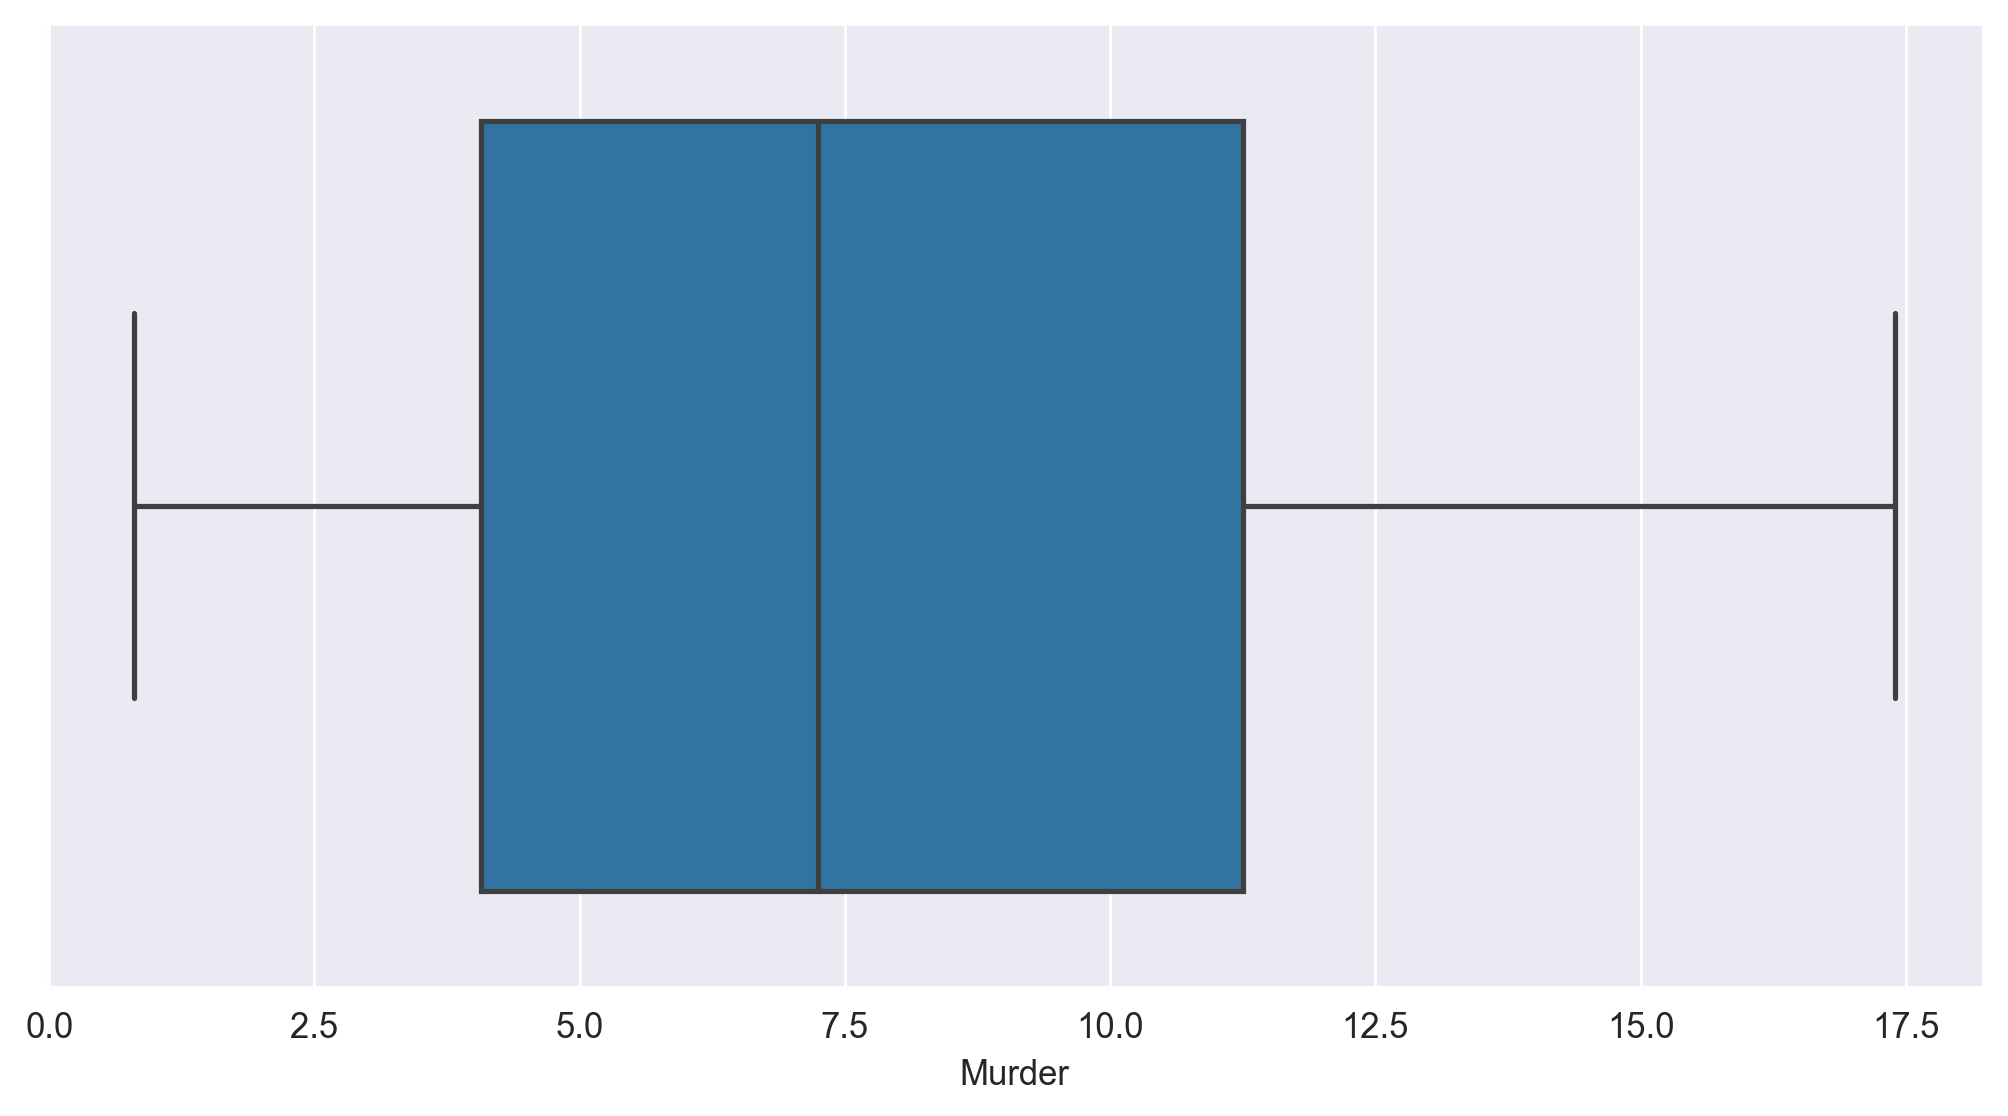

In [10]:
sns.boxplot(x=df['Murder'])

<Axes: xlabel='Assault'>

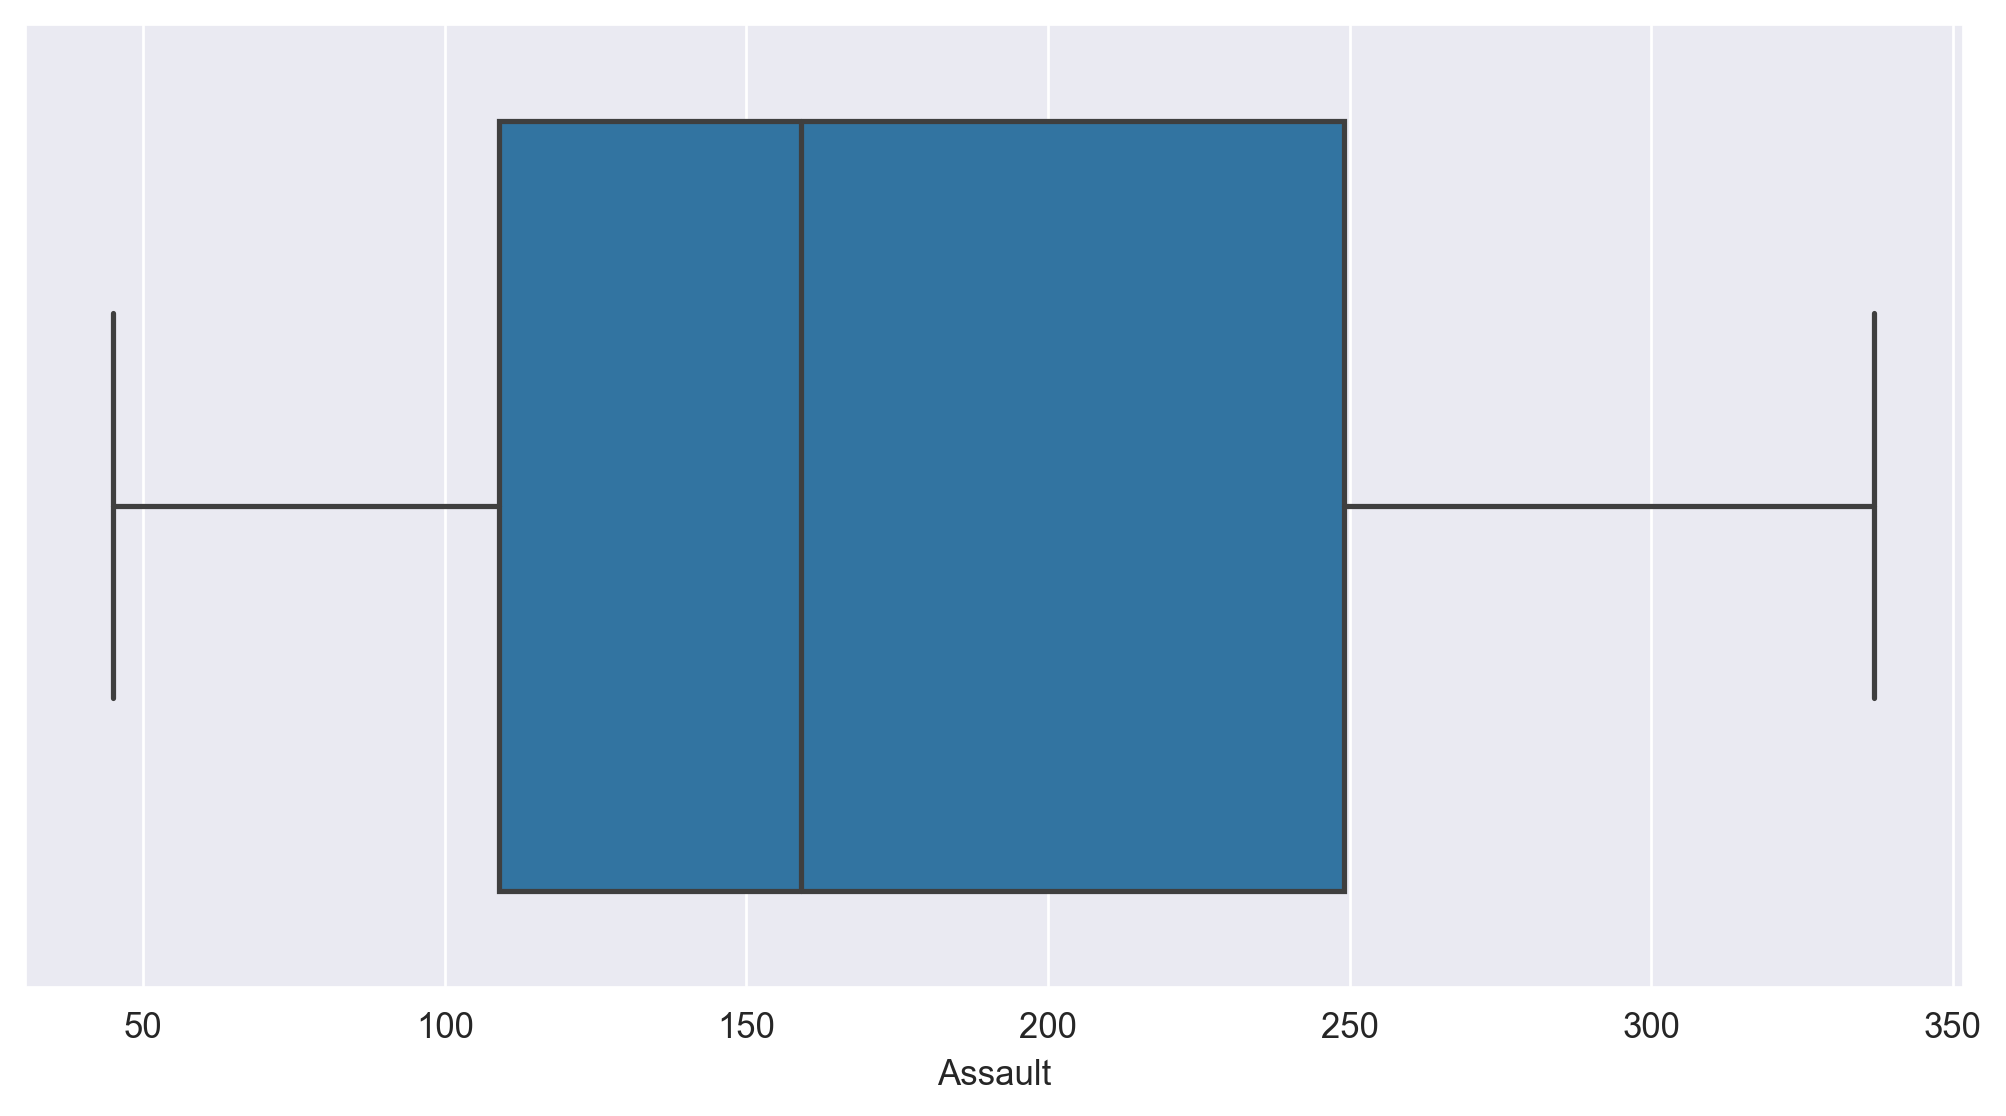

In [11]:
sns.boxplot(x=df['Assault'])

<Axes: xlabel='UrbanPop'>

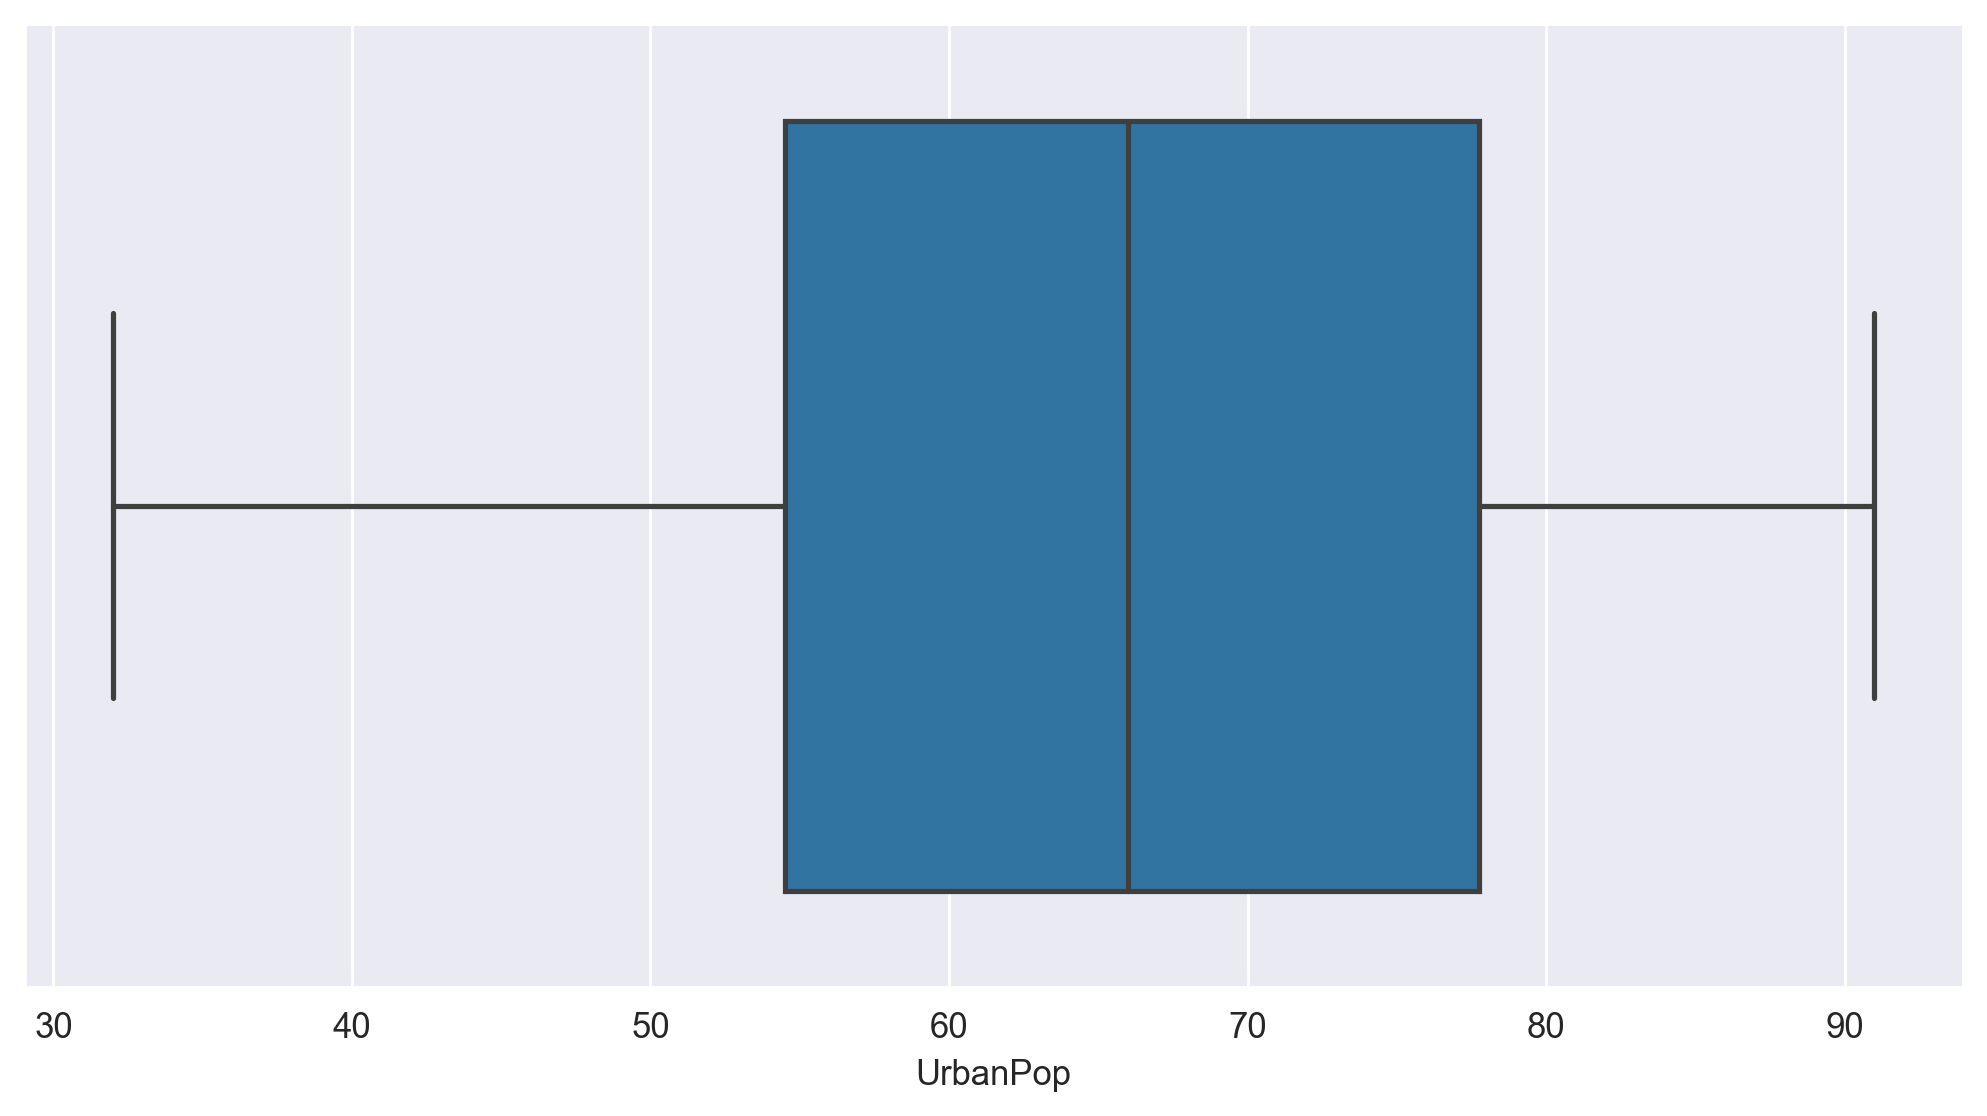

In [12]:
sns.boxplot(x=df['UrbanPop'])

<Axes: xlabel='Rape'>

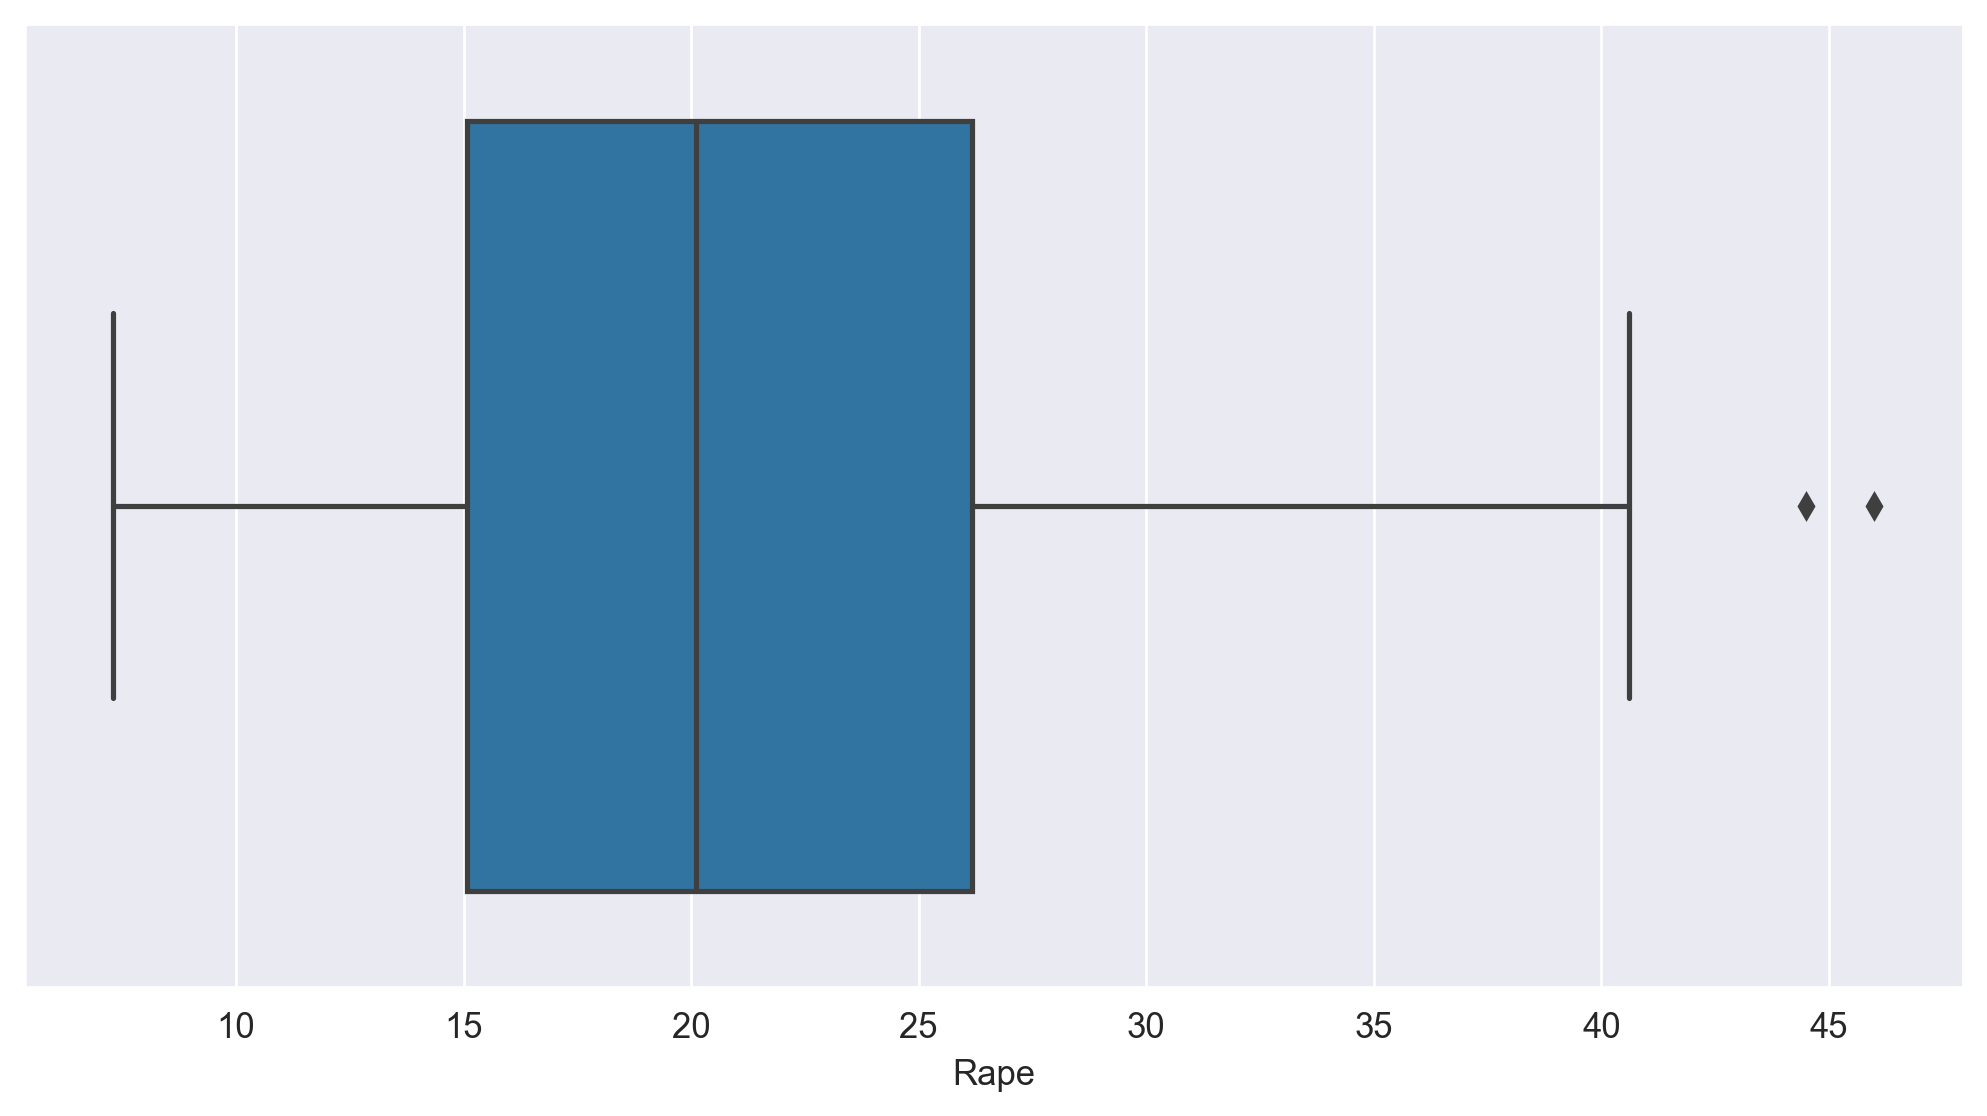

In [13]:
sns.boxplot(x=df['Rape'])

In [14]:
#There are outliers in column Rape
#Replacing the outiler with capping method

In [15]:
def outlier_detection (data,colname):
    q1=data[colname].quantile(0.25)
    q3=data[colname].quantile(0.75)
    iqr=q3-q1
    upper =q3+(1.5*iqr)
    lower = q1 - (1.5*iqr)
    return lower,upper

In [16]:
outlier_detection (df,'Rape')

(-1.5750000000000028, 42.825)

In [17]:
df.loc[df['Rape']>42.825,'Rape']=42.825
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.200
1,10.0,263,48,42.825
2,8.1,294,80,31.000
3,8.8,190,50,19.500
4,9.0,276,91,40.600
5,7.9,204,78,38.700
6,3.3,110,77,11.100
7,5.9,238,72,15.800
8,15.4,335,80,31.900
9,17.4,211,60,25.800


# Model Building

In [18]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514,  0.00719922],
       [ 0.51301858,  1.11805959, -1.22406668,  2.40232482],
       [ 0.07236067,  1.49381682,  1.00912225,  1.0926203 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18108811],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.15588993],
       [ 0.02597562,  0.40290872,  0.86954794,  1.94545115],
       [-1.04088037, -0.73648418,  0.79976079, -1.11144904],
       [-0.43787481,  0.81502956,  0.45082502, -0.59088995],
       [ 1.76541475,  1.99078607,  1.00912225,  1.19230183],
       [ 2.22926518,  0.48775713, -0.38662083,  0.51668259],
       [-0.57702994, -1.51224105,  1.21848371, -0.10355803],
       [-1.20322802, -0.61527217, -0.80534376, -0.76810155],
       [ 0.60578867,  0.94836277,  1.21848371,  0.31731953],
       [-0.13637203, -0.70012057, -0.03768506, -0.01495223],
       [-1.29599811, -1.39102904, -0.5959823 , -1.08929758],
       [-0.41468229, -0.67587817,  0.03210209, -0.34722399],
       [ 0.44344101, -0.

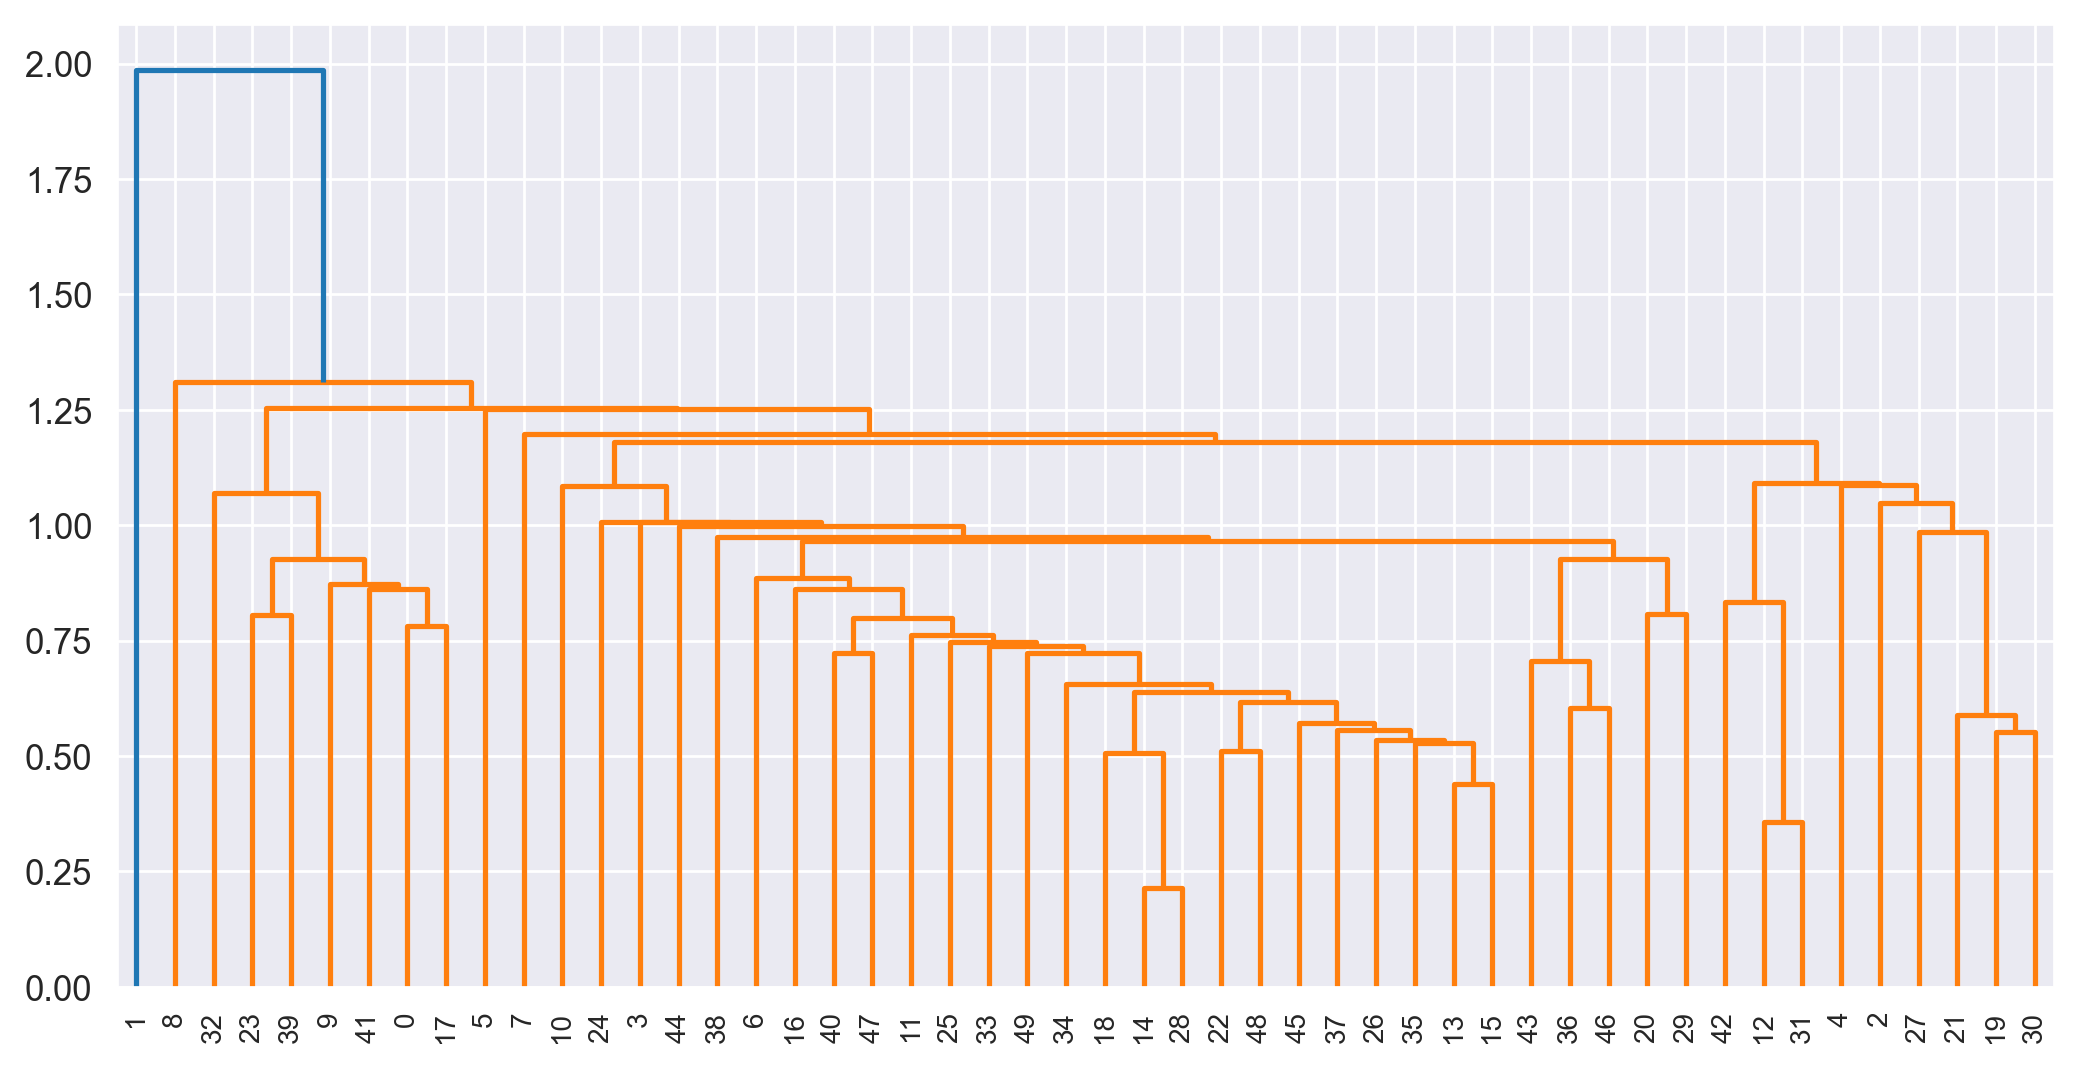

In [21]:
lk = hierarchy.linkage(x, method='single')
dendrogram = hierarchy.dendrogram(lk)

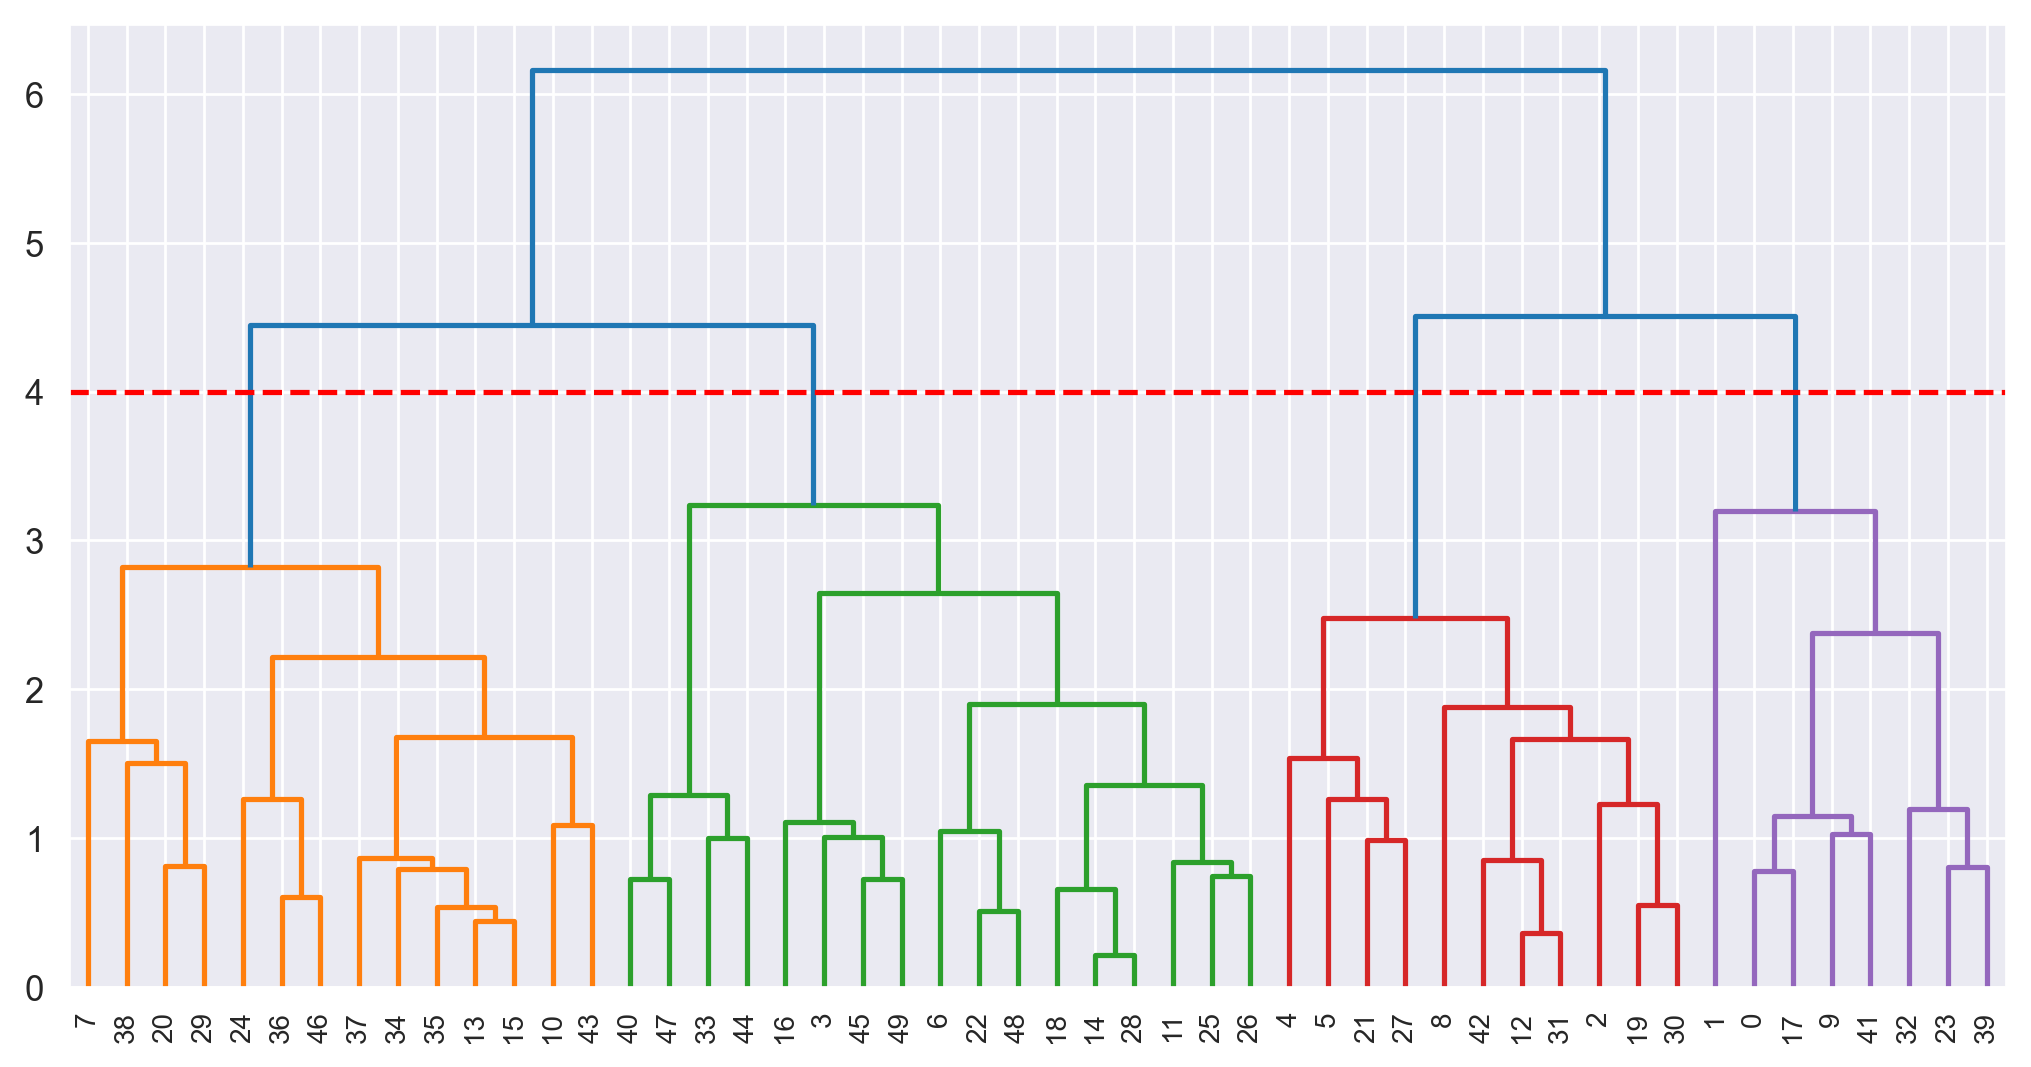

In [23]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 4, linestyle = '--', color = 'red')

In [25]:
hc = AgglomerativeClustering(n_clusters=4)#from dendrogram k=4

ypred = hc.fit_predict(x)
ypred

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [26]:
df['cluster'] = ypred
df

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.200,3
1,10.0,263,48,42.825,1
2,8.1,294,80,31.000,1
3,8.8,190,50,19.500,0
4,9.0,276,91,40.600,1
5,7.9,204,78,38.700,1
6,3.3,110,77,11.100,0
7,5.9,238,72,15.800,0
8,15.4,335,80,31.900,1
9,17.4,211,60,25.800,3


In [27]:
df.groupby('cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.204167
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714
